## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 6'

In [3]:
df_team_recruit = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit.csv'))

In [4]:
df_team_recruit.head()

,Column1,primary_key,freshman_year,name,position,high_school,rating,stars,committed_to,recruit_type,...,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank,star_ranking,star_position
0,0,"2018, Air Force",2018,Jace Bobo,OLB,Cy-Fair,0.7953,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_OLB
1,1,"2018, Air Force",2018,Malik Rodgers,WR,Shadow Creek,0.8065,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_WR
2,2,"2018, Air Force",2018,Jaylen Jones,S,Alief Hastings,0.8054,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_S
3,3,"2018, Air Force",2018,Warren Bryan,DUAL,Damien,0.7792,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_DUAL
4,4,"2018, Air Force",2018,Chris Kane,TE,San Clemente,0.8255,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_TE


In [5]:
df_t_r = df_team_recruit[['freshman_year', 'rating', 'stars', 'height', 'weight', 'ncaa_year', 'total_games', 'win', 'loss', 'off_rank', 'def_rank',]]

## Create clusters and elbow curve

In [6]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [7]:
score = [kmeans[i].fit(df_t_r).score(df_t_r) for i in range(len(kmeans))]

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\clust

In [8]:
score

[-63650102.50138426,
 -43565777.69110244,
 -33440726.471265458,
 -26801110.965479314,
 -23173716.859458726,
 -19740928.34895666,
 -17356554.00024337,
 -16025564.745275877,
 -14885657.252143942]

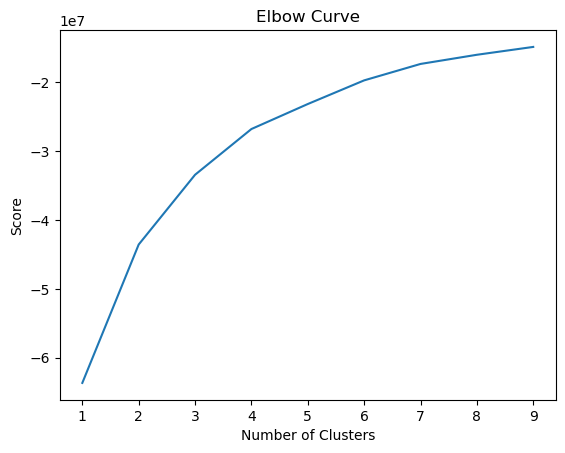

In [9]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [10]:
# I decided to use 4 clusters as that is the closest to the curve leveling out without using too many clusters.

In [11]:
kmeans = KMeans(n_clusters = 4) 

## Create clusters column

In [12]:
kmeans.fit(df_t_r)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
df_t_r['clusters'] = kmeans.fit_predict(df_t_r)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\AppData\Local\Temp\ipykernel_19240\1071306222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_r['clusters'] = kmeans.fit_predict(df_t_r)


In [14]:
df_t_r.head()

,freshman_year,rating,stars,height,weight,ncaa_year,total_games,win,loss,off_rank,def_rank,clusters
0,2018,0.7953,2,73.0,210.0,2018,12,5,7,52,43,0
1,2018,0.8065,3,69.0,165.0,2018,12,5,7,52,43,0
2,2018,0.8054,3,73.0,205.0,2018,12,5,7,52,43,0
3,2018,0.7792,2,74.0,190.0,2018,12,5,7,52,43,0
4,2018,0.8255,3,77.0,213.0,2018,12,5,7,52,43,0


In [15]:
df_t_r['clusters'].value_counts()

0    3758
1    3267
3    3081
2    2897
Name: clusters, dtype: int64

# Plot clusters

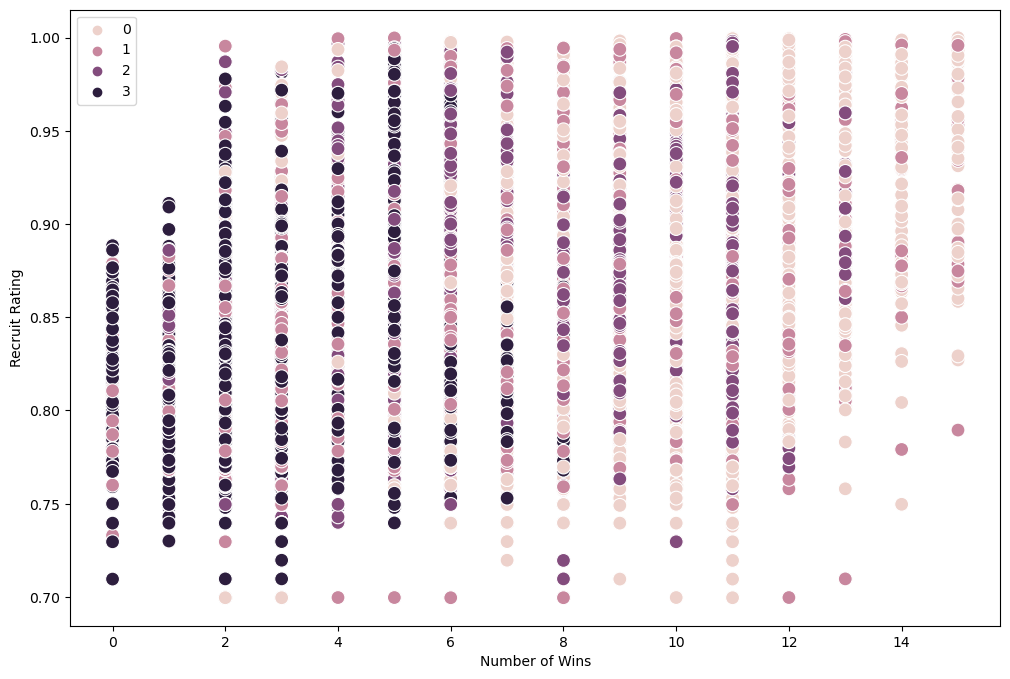

In [16]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['win'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Wins') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

In [17]:
# This scatterplot shows clusters for number of wins and recruit rating. This indicates on average the darker the cluster the less wins a team is receiving.

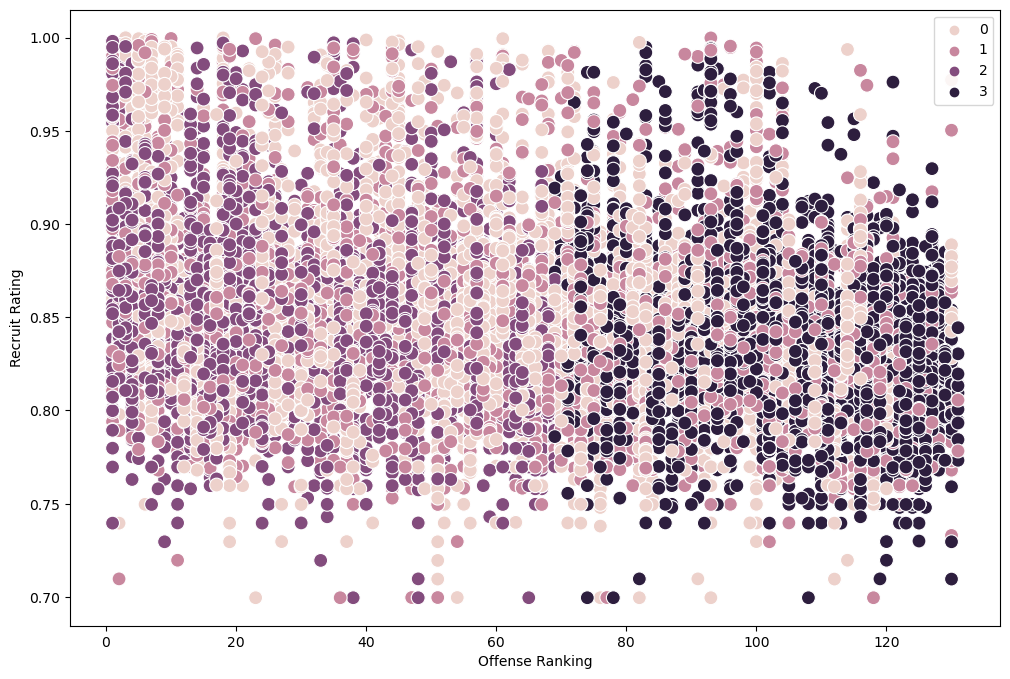

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['off_rank'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Offense Ranking') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

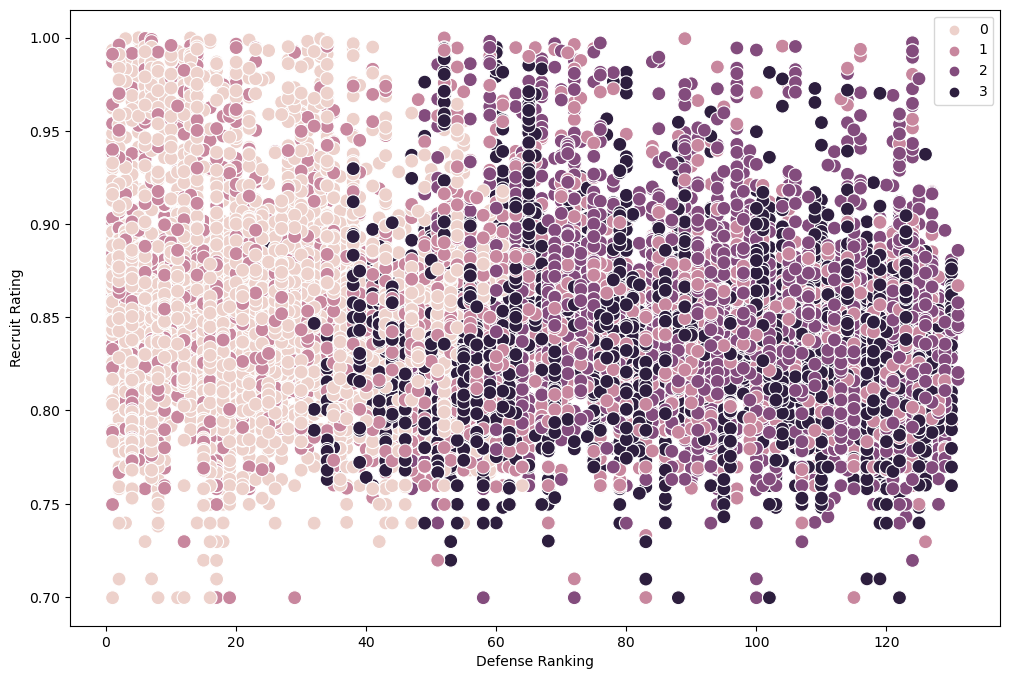

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['def_rank'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Defense Ranking') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

In [20]:
# The two scatterplots above show the difference in recruiting on team Offense and Defense ranking. It is interesting that based on the clusters there
# is a difference in how the rating of a recruit effects the offense and defense rankings. For example, the black cluster is much more consentrated on high 
# offense rankings where as the black cluster has a wider range for defense rankings. Along with this the beige cluster is much more consentrated on low rankings
# for denfense ranking and the beige cluster has a wider range for offense rankings.
# This would lead me to believe recruit rating affect offense and defense rankings differently.  

## Clusters descriptive statistics

In [21]:
df_t_r.loc[df_t_r['clusters'] == 3, 'cluster'] = 'black'
df_t_r.loc[df_t_r['clusters'] == 2, 'cluster'] = 'dark purple'
df_t_r.loc[df_t_r['clusters'] == 1, 'cluster'] = 'pink'
df_t_r.loc[df_t_r['clusters'] == 0, 'cluster'] = 'beige'

C:\Users\justi\AppData\Local\Temp\ipykernel_19240\3255352867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_r.loc[df_t_r['clusters'] == 3, 'cluster'] = 'black'


In [22]:
df_t_r.groupby('cluster').agg({'rating':['mean', 'median'], 
                         'win':['mean', 'median'], 
                         'off_rank':['mean', 'median'],
                          'def_rank':['mean', 'median']})

rating               win           off_rank          def_rank  \
                 mean  median      mean median        mean median       mean   
cluster                                                                        
beige        0.854287  0.8511  8.514635    9.0   58.275146   57.0  24.459819   
black        0.834538  0.8340  3.609867    3.0  103.813697  106.0  83.190523   
dark purple  0.848129  0.8452  6.319641    6.0   32.590266   31.0  94.427684   
pink         0.847387  0.8444  6.452403    7.0   62.669728   62.0  62.357208   

                    
            median  
cluster             
beige         23.0  
black         81.0  
dark purple   94.0  
pink          61.0

In [23]:
df_team_recruit.head()

,Column1,primary_key,freshman_year,name,position,high_school,rating,stars,committed_to,recruit_type,...,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank,star_ranking,star_position
0,0,"2018, Air Force",2018,Jace Bobo,OLB,Cy-Fair,0.7953,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_OLB
1,1,"2018, Air Force",2018,Malik Rodgers,WR,Shadow Creek,0.8065,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_WR
2,2,"2018, Air Force",2018,Jaylen Jones,S,Alief Hastings,0.8054,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_S
3,3,"2018, Air Force",2018,Warren Bryan,DUAL,Damien,0.7792,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_DUAL
4,4,"2018, Air Force",2018,Chris Kane,TE,San Clemente,0.8255,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_TE


In [28]:
df_team_recruit.drop(columns = 'Column1')

,primary_key,freshman_year,name,position,high_school,rating,stars,committed_to,recruit_type,height,...,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank,star_ranking,star_position
0,"2018, Air Force",2018,Jace Bobo,OLB,Cy-Fair,0.7953,2,Air Force,HighSchool,73.0,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_OLB
1,"2018, Air Force",2018,Malik Rodgers,WR,Shadow Creek,0.8065,3,Air Force,HighSchool,69.0,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_WR
2,"2018, Air Force",2018,Jaylen Jones,S,Alief Hastings,0.8054,3,Air Force,HighSchool,73.0,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_S
3,"2018, Air Force",2018,Warren Bryan,DUAL,Damien,0.7792,2,Air Force,HighSchool,74.0,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_DUAL
4,"2018, Air Force",2018,Chris Kane,TE,San Clemente,0.8255,3,Air Force,HighSchool,77.0,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12998,"2022, Wyoming",2022,Mykel Janise,OT,West Brook,0.8156,3,Wyoming,HighSchool,76.0,...,2022,Wyoming,Mountain West,13,7,6,119,57,3_star,3_star_OT
12999,"2022, Wyoming",2022,Rex Johnsen,IOL,Logan-Magnolia,0.8156,3,Wyoming,HighSchool,77.0,...,2022,Wyoming,Mountain West,13,7,6,119,57,3_star,3_star_IOL
13000,"2022, Wyoming",2022,Jaden Williams,DL,Campbell Hall School,0.7983,3,Wyoming,HighSchool,76.0,...,2022,Wyoming,Mountain West,13,7,6,119,57,3_star,3_star_DL
13001,"2022, Wyoming",2022,Luke Sandy,DL,Legend,0.8117,3,Wyoming,HighSchool,74.0,...,2022,Wyoming,Mountain West,13,7,6,119,57,3_star,3_star_DL


In [29]:
df_team_recruit.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit_f.csv'))